In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [2]:
np.random.seed(42)
time_steps = 200
data=np.cos(np.linspace(0,20,time_steps))+np.random.normal(0,0.2,time_steps)

In [3]:
df=pd.DataFrame({'Value':data})
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(df)

In [4]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(scaled_data, window_size)


In [5]:
# Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input for GRU (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [8]:
# Build GRU model
model = Sequential([
    GRU(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=2)


Epoch 1/20
5/5 - 1s - loss: 0.4690 - 1s/epoch - 284ms/step
Epoch 2/20
5/5 - 0s - loss: 0.3005 - 15ms/epoch - 3ms/step
Epoch 3/20
5/5 - 0s - loss: 0.1869 - 19ms/epoch - 4ms/step
Epoch 4/20
5/5 - 0s - loss: 0.1003 - 17ms/epoch - 3ms/step
Epoch 5/20
5/5 - 0s - loss: 0.0531 - 18ms/epoch - 4ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0423 - 22ms/epoch - 4ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0451 - 19ms/epoch - 4ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0399 - 16ms/epoch - 3ms/step
Epoch 9/20
5/5 - 0s - loss: 0.0329 - 18ms/epoch - 4ms/step
Epoch 10/20
5/5 - 0s - loss: 0.0307 - 16ms/epoch - 3ms/step
Epoch 11/20
5/5 - 0s - loss: 0.0293 - 16ms/epoch - 3ms/step
Epoch 12/20
5/5 - 0s - loss: 0.0273 - 16ms/epoch - 3ms/step
Epoch 13/20
5/5 - 0s - loss: 0.0247 - 17ms/epoch - 3ms/step
Epoch 14/20
5/5 - 0s - loss: 0.0229 - 18ms/epoch - 4ms/step
Epoch 15/20
5/5 - 0s - loss: 0.0214 - 16ms/epoch - 3ms/step
Epoch 16/20
5/5 - 0s - loss: 0.0198 - 13ms/epoch - 3ms/step
Epoch 17/20
5/5 - 0s - loss: 0.0186 - 18ms/epoch 

In [9]:
# Predict and inverse scale
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)


2/2 [==============================] - 0s 0s/step


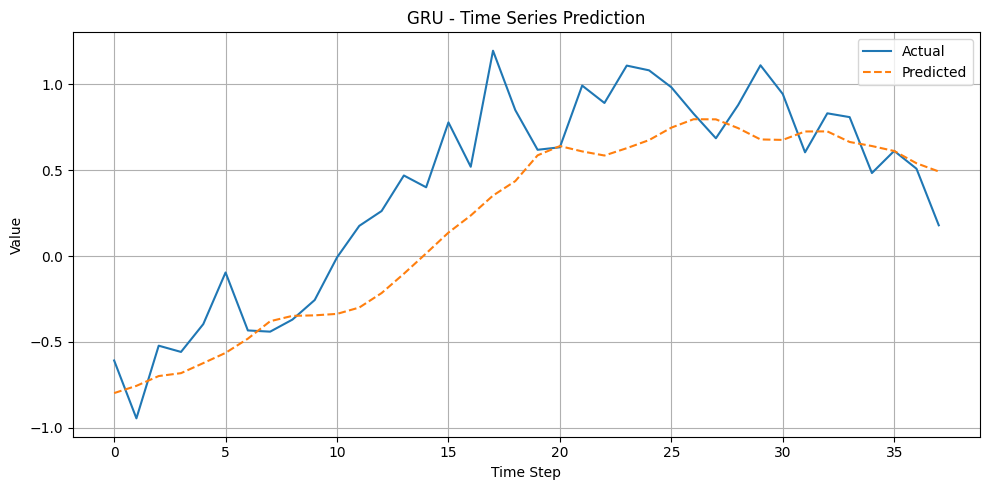

In [10]:
# Plot predictions vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted', linestyle='--')
plt.title("GRU - Time Series Prediction")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import torch
torch.cuda.empty_cache()
